<a href="https://colab.research.google.com/github/miguelsmachado/tutoriais/blob/master/maceiteiro_grafico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Maceteiro de Plotagem Gráfica para Data Science

##Matplotlib


Guias:
- [Página oficial do matplotlib](https://matplotlib.org)
- [Artigo sobre Matplotlib](https://realpython.com/python-matplotlib-guide/)
- [Tutoriais do Matplotlib](https://https://matplotlib.org/tutorials/index.html)
- [User Guide](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)

### Conhecendo mais intimamente o Matplotlib

Se você lembrar das aulas anteriores, plotar um gráfico é muito simples e direto. Algo como `plt.plot(x, y)` vai te dar prontamente um gráfico. 

No entanto, essa abstração esconde um segredo importante: a hierarquia de 3 objetos que estão por trás de cada *plot*. Vou usar as imagens do artigo [*Python Plotting With Matplotlib*](https://realpython.com/python-matplotlib-guide/) para facilitar o entendimento desse conceito.

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/fig_map.bc8c7cabd823.png" height="300px"></center>

O objeto mais "exterior" a cada plot é o objeto do tipo `Figure`. Dentro de uma `Figure` existe um objeto do tipo `Axes`. Dentro de cada `Axes` ficam os objetos menores, como legendas, títulos, textos e *tick marks*.

Como disse Brad Solomon no artigo, a principal confusão das pessoas é não entenderem que um *plot* (ou gráfico) individual está contido dentro de um objeto `Axes`. Uma `Figure` não é o *plot* em si, ela pode conter um ou mais *plots* (e cada *plot* é um `Axes`).

Como eu disse, cada `Axes` é composto de objetos menores que compõe o *plot* propriamente dito. A grande maioria das pessoas (incluindo eu mesmo) conhece apenas or principais, como título, eixos, labels e legenda. No entanto, para você ver a anatomia completa dentro de um `Axes`, pode usar o código abaixo, disponibilizado na [documentação oficial do `matplotlib`](https://matplotlib.org/examples/showcase/anatomy.html).


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
sns.set()

###Poder do Matlib

Abaixo temos um exemplo do poder de plotagem do Matlib.

Muitas coisas podem ser aprendidas e *copiadas* desse exemplo.

https://matplotlib.org/examples/showcase/anatomy.html

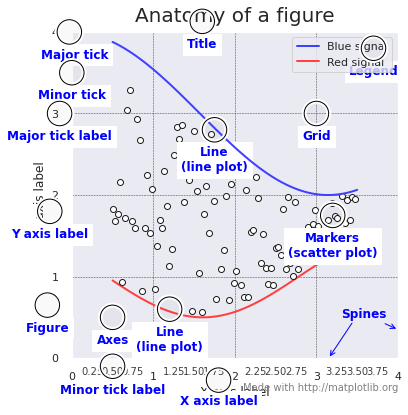

In [4]:
#@title
# This figure shows the name of several matplotlib elements composing a figure

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter


np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()


###Gráfico de Linha Simples criado a partir de 2 arrays numpy

In [5]:
x = np.arange(10)
y = np.random.normal(scale= 10, size=10)

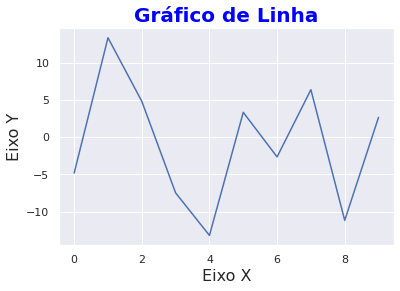

In [6]:
plt.plot(x, y)
plt.title("Gráfico de Linha",fontdict={'fontsize':20, 'color':'blue', 'fontweight':'bold'})
plt.xlabel("Eixo X", fontdict={'fontsize':16})
plt.ylabel("Eixo Y", fontdict={'fontsize':16})
plt.show()

###Trabalhando orientado ao objeto:

O Matplotlib retorna duas variáveis, uma figura e um axis, como visto anteriormente.

####Realizando 2 plots em um único axis

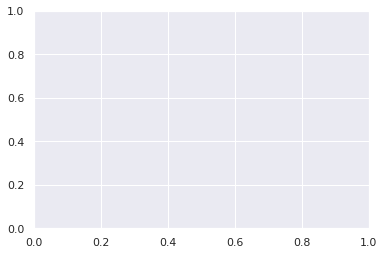

In [7]:
# criando somente a figura:
fig, ax = plt.subplots()

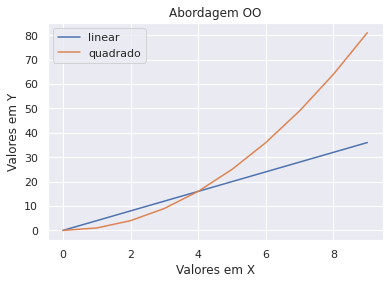

In [8]:
# Criando a figura e os eixos

x = np.arange(0, 10)

fig, ax = plt.subplots()
ax.plot(x, 4*x, label="linear")
ax.plot(x, x**2, label="quadrado")
ax.set_title("Abordagem OO")
ax.set_ylabel("Valores em Y")
ax.set_xlabel("Valores em X")
ax.legend()

plt.show()

#### Criando 2 axis em uma mesma figura

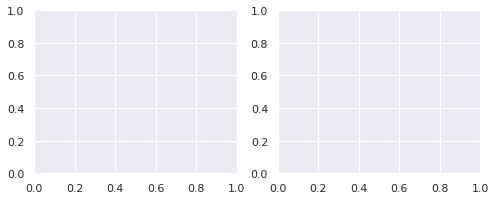

In [9]:
# criando somente a figura:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))

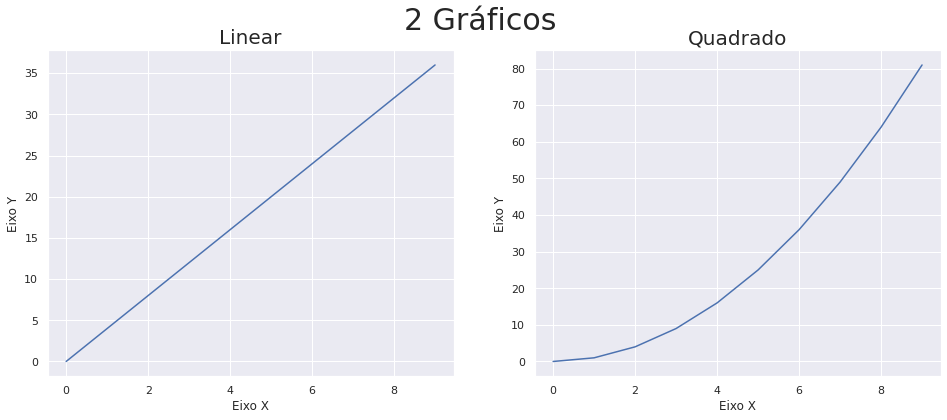

In [10]:
# Criando a figura e os eixos
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
fig.suptitle("2 Gráficos", fontsize=30)

ax[0].plot(x, 4*x)
ax[0].set_title("Linear", fontdict={'fontsize':20})
ax[0].set_xlabel("Eixo X")
ax[0].set_ylabel("Eixo Y")

ax[1].plot(x, x**2)
ax[1].set_title("Quadrado", fontdict={'fontsize':20})
ax[1].set_xlabel("Eixo X")
ax[1].set_ylabel("Eixo Y")

plt.show()

###Trabalhando com a interface Pyplot:

É a forma mais prática de trabalhar. É mais direta.

As plotagens são feitas diretamente com o `plt.`e os atributos e métodos são passados da mesma forma que eram passados no `ax.`

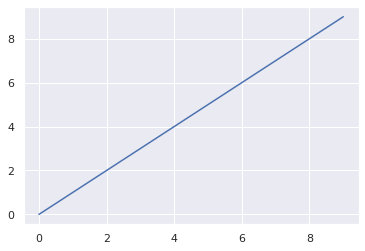

In [11]:
x = np.arange(10)

plt.plot(x, x);

Text(0, 0.5, 'Eixo y')

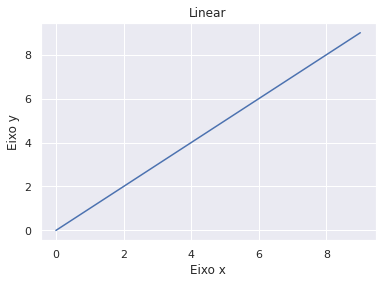

In [12]:
plt.plot(x, x)
plt.title("Linear")
plt.xlabel("Eixo x")
plt.ylabel("Eixo y")

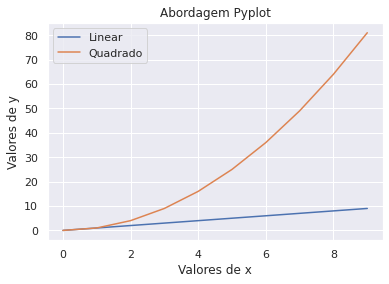

In [13]:
plt.plot(x, x, label="Linear")
plt.plot(x, x**2, label="Quadrado")
plt.title("Abordagem Pyplot")
plt.ylabel("Valores de y")
plt.xlabel("Valores de x")
plt.legend()
plt.show()

###Gráfico de linhas

[Documentação](https://matplotlib.org/gallery/lines_bars_and_markers/simple_plot.html#sphx-glr-gallery-lines-bars-and-markers-simple-plot-py)

####Preparação do Ambiente

In [14]:
import pandas as pd

#criando o dataframe
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/dengue-dataset.csv")

df.data = pd.to_datetime(df.data) # -> Convertendo para o formato datetime
df.set_index('data', inplace=True) 

df.head()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
data,,,,,
1998-01-01,237,179.2,25.7,20.2,28.1
1998-02-01,331,226.3,25.1,20.0,28.0
1998-03-01,562,149.1,24.8,22.4,27.2
1998-04-01,187,46.4,22.7,18.1,26.0
1998-05-01,32,88.3,19.2,15.7,22.9


####Realizando o plots

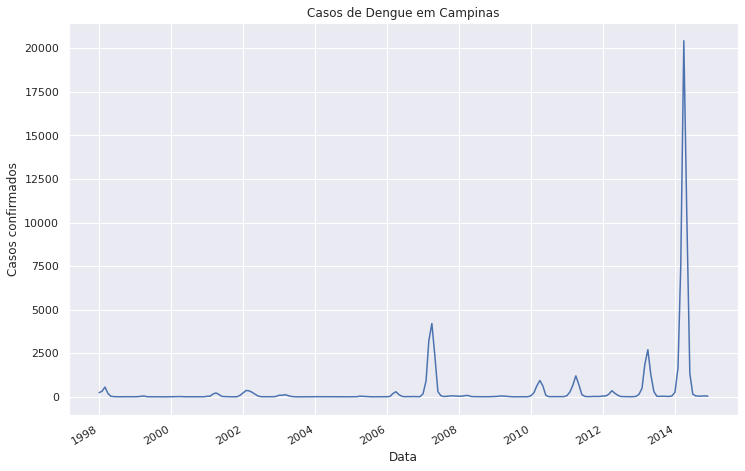

In [15]:
fig, ax = plt.subplots(figsize=(12,8))

fig.autofmt_xdate() # -> Auto ajuste de inclinação dos labels

ax.plot('casos-confirmados', data=df)
ax.set_title("Casos de Dengue em Campinas")
ax.set_xlabel("Data")
ax.set_ylabel("Casos confirmados")

plt.show()

#####Plotando 2 informações na mesma imagem

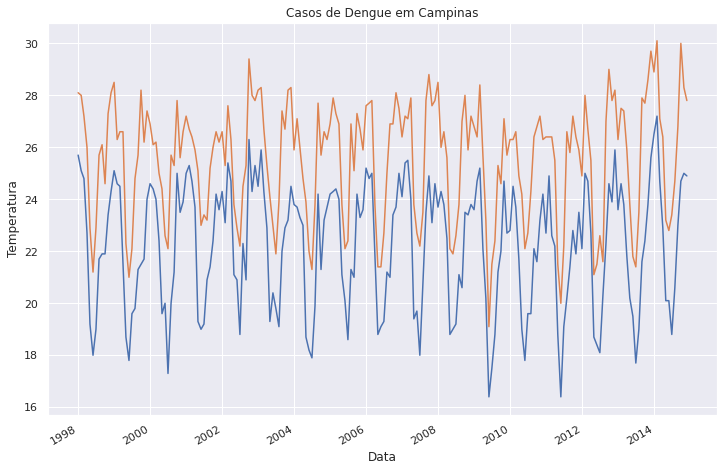

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
fig.autofmt_xdate() # -> Auto ajuste de inclinação dos labels

ax.plot('temperatura-media', data=df)
ax.plot('temperatura-maxima', data=df)
ax.set_title("Casos de Dengue em Campinas")
ax.set_xlabel("Data")
ax.set_ylabel("Temperatura")

plt.show()

#####Plotando intervalos específicos

In [17]:
df_sel = df.loc['2011-01-01':'2013-01-01'] # -> Selecionando o intervalo desejado

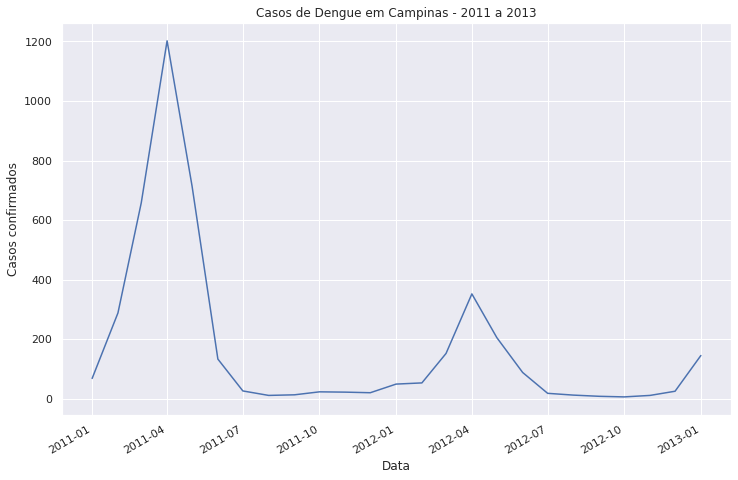

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
fig.autofmt_xdate() # -> Auto ajuste de inclinação dos labels

ax.plot('casos-confirmados', data=df_sel)
ax.set_title("Casos de Dengue em Campinas - 2011 a 2013")
ax.set_xlabel("Data")
ax.set_ylabel("Casos confirmados")
plt.show()

####Plotar múltiplos gráficos separadamente 

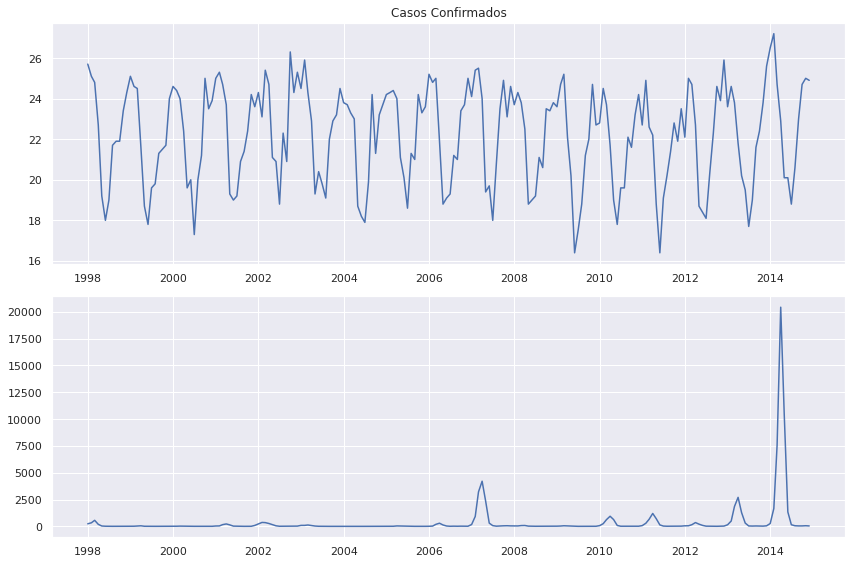

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8))

ax[0].plot('temperatura-media', data=df)
ax[0].set_title("Temperatura Média")

ax[1].plot('casos-confirmados', data=df)
ax[0].set_title("Casos Confirmados")

plt.tight_layout()

###Histograma

O histograma é indicado para plotar gráficos que se deseja entender como funciona a distribuição dos dados. O ideal é que ele seja simétrico, normal e centralizado, com seu formato similar ao de um sino!

#### Histograma normal

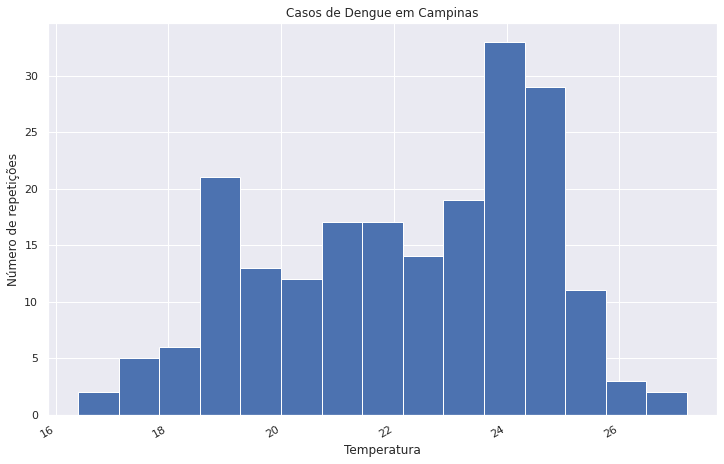

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
fig.autofmt_xdate() # -> Auto ajuste de inclinação dos labels

ax.hist('temperatura-media', data=df, bins=15)
ax.set_title("Casos de Dengue em Campinas")
ax.set_xlabel("Temperatura")
ax.set_ylabel("Número de repetições")

plt.show()

####Histograma em porcentagem

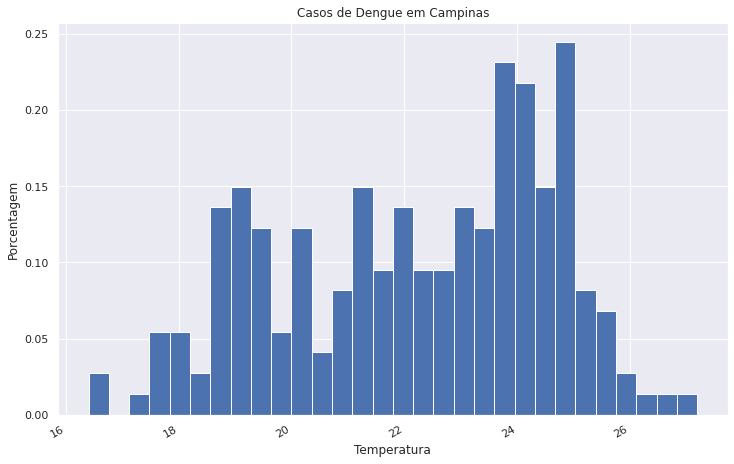

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
fig.autofmt_xdate() # -> Auto ajuste de inclinação dos labels

ax.hist('temperatura-media', data=df, density=True, bins=30)
ax.set_title("Casos de Dengue em Campinas")
ax.set_xlabel("Temperatura")
ax.set_ylabel("Porcentagem")

plt.show()

####Histograma em porcentagem e acumulado

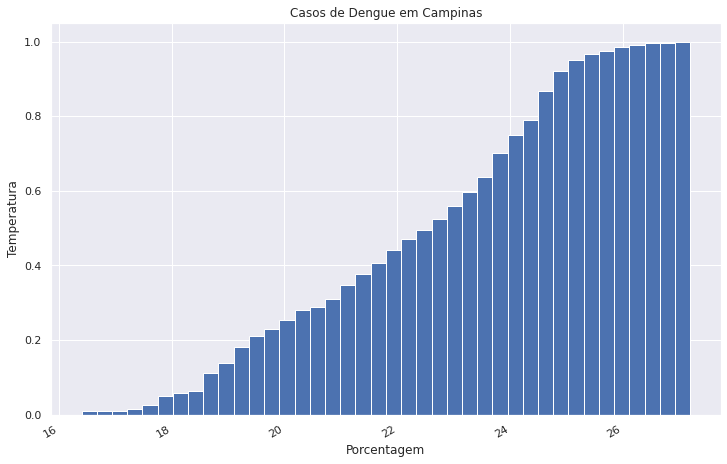

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
fig.autofmt_xdate() # -> Auto ajuste de inclinação dos labels

ax.hist('temperatura-media', data=df, density=True, cumulative=True, bins=40)
ax.set_title("Casos de Dengue em Campinas")
ax.set_xlabel("Porcentagem")
ax.set_ylabel("Temperatura")

plt.show()

###Gráfico de barras

####Preparação dos dados

In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/entrada_passageiro_linha1.csv")

df.drop(index=23)
df.head()

,Estação,Entradas
0,Jabaquara,90.0
1,Conceição,40.0
2,São Judas,20.0
3,Saúde,36.0
4,Praça da Árvore,22.0


####Plotando atráves do pandas

O pandas acessa o matplotlib por tras dos panos para realizar os plots

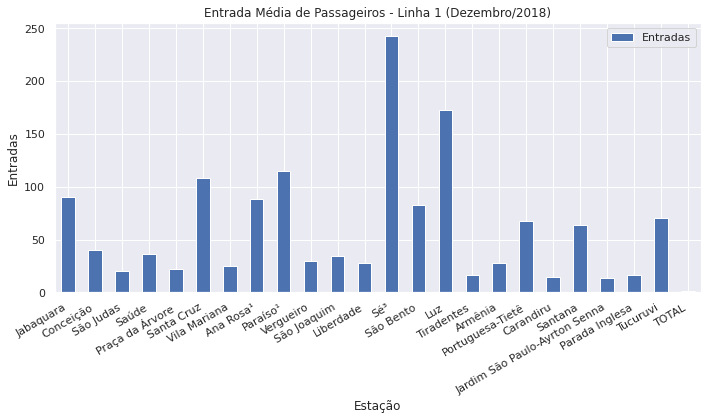

In [24]:
fig, ax = plt.subplots(figsize=(10,6))

df.plot(x="Estação", y="Entradas", kind="bar", ax=ax) # -> quando for utilizar o
# pandas na plotagem, crie a figura igualmente antes de pois passe o ax como 
# argumento. Assim, vc pode criar os títulos e labels normalmente

ax.set_title("Entrada Média de Passageiros - Linha 1 (Dezembro/2018)")
ax.set_xlabel("Estação")
ax.set_ylabel("Entradas")

fig.autofmt_xdate() # -> Auto ajuste de inclinação dos labels

plt.tight_layout()

####Preparando dados para exemplo 2

In [25]:
df = pd.read_csv("https://www.dropbox.com/s/ttho30qxqe47j43/datahackers-survey-2019-anonymous-responses.csv?dl=1")

# extrair o nome da variável da tupla
df.columns = [eval(col)[1] for col in df.columns]

df.head()

,id,age,gender,living_in_brasil,living_state,born_or_graduated,degreee_level,job_situation,workers_number,manager,salary_range,time_experience_data_science,time_experience_before,is_data_science_professional,linear_regression,logistic_regression,glms,decision_tree,random_forest,neural_networks,bayesian_inference,ensemble,svms,cnns,rnns,hmms,gans,markov_chains,nlp,gradient_boosted_machines,cluster_analysis,survival_analysis,longitudinal_data_analysis,joint analysis,no_listed_methods,sql_,r,python,c_c++_c#,dotnet,...,microsoft_azure,do_not_know,other,data_hackers_blog,data_hackers_podcast,weekly_newsletter,slack_channel,data_hackers_bootcamp,do_not_know_data_hackers,prefered_data_hackers_initiative,telegram_groups,whatsapp_groups,youtube_channels,other_brasilian_blogs,other_slack_channels,twitter,abroad_blogs,abroad_podcasts,meetups_and_events,only_data_hackers,other,udacity,coursera,udemy,height,edx,data_camp,data_quest,kaggle_learn,online_courses,other,data_science_plataforms_preference,other,draw_participation,living_macroregion,origin_macroregion,anonymized_degree_area,anonymized_market_sector,anonymized_manager_level,anonymized_role
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,de R$ 2.001/mês a R$ 3000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,de 6 a 10 anos,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,Newsletter Semanal,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,de 2 a 3 anos,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,Alura,NaN,1.0,Região Sudeste,Região Sudeste,Computação / Engenharia de Software / Sistemas...,Tecnologia/Fábrica de Software,NaN,Business Intelligence/Analista de BI
4,pj9mgud4d6mdct1l7vq0pj9mgu78h6ju,27.0,Masculino,1,NaN,1.0,Graduação/Bacharelado,Freelancer,de 6 a 10,1.0,de R$ 6.001/mês a R$ 8.000/mês,de 4 a 5 anos,de 4 a 5 anos,1,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,Blog/Medium do Data Hackers,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,Udemy,NaN,1.0,NaN,NaN,Computação / Engenharia de Software / Sistemas...,Internet/Ecommerce,"C-level (CDO, CIO, CTO)",NaN


####Plotando direto de um `value_counts`

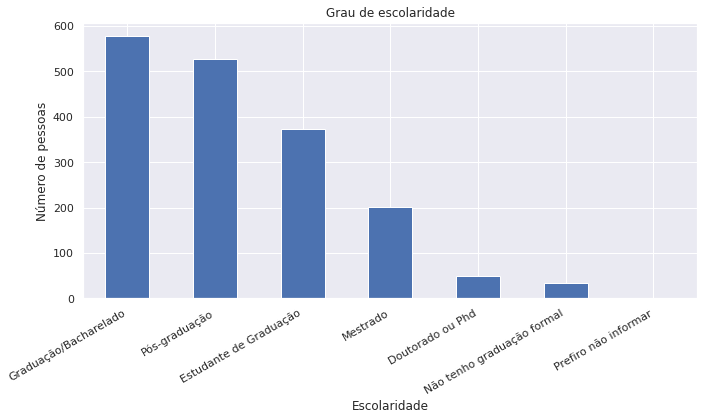

In [26]:
fig, ax = plt.subplots(figsize=(10,6))

df.degreee_level.value_counts().plot(kind='bar', ax=ax)
ax.set_title("Grau de escolaridade")
ax.set_xlabel("Escolaridade")
ax.set_ylabel("Número de pessoas")

fig.autofmt_xdate() # -> Auto ajuste de inclinação dos labels

plt.tight_layout()

###Gráfico de Pizza

**NUNCA USE!!!**

####Preparação dos dados

In [27]:
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/ocorrencias_aviacao.csv",
                index_col='codigo_ocorrencia')

df.head()

,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
codigo_ocorrencia,,,,,,,,,,,,,,,,,,,,,
201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085,-63.0333,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644,-61.2589,CACOAL,RO,BRASIL,SSKW,2016-05-13,19:19:00,SIM,ATIVA,IG-084/CENIPA/2016,NÃO,NaN,0,1,NÃO,2018-08-28
201805021421302,INCIDENTE,AERÓDROMO,AERÓDROMO,ADRM,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,2018-03-09,22:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,2013-11-25,12:32:00,NaN,FINALIZADA,IG-209/CENIPA/2013,SIM,2014-04-07,0,1,NÃO,2018-08-28
201103187273112,INCIDENTE,OUTROS,OUTROS,OTHR,-13.1950,-60.8184,CEREJEIRAS,RO,BRASIL,****,2011-03-18,13:30:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28


In [28]:
# extrair as ocorrências para um dicionário
ocorrencia_classificacao = dict(df.ocorrencia_classificacao.value_counts())

# preparar dados para o pie chart
labels = ocorrencia_classificacao.keys()
sizes = ocorrencia_classificacao.values()
explode = (0.1, 0, 0)

####Plotando o gráfico de pizza

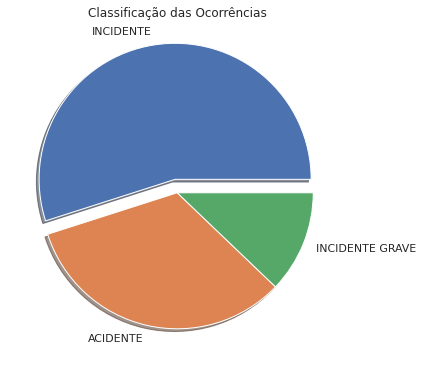

In [29]:
# plotar o gráfico de pizza
fig, ax = plt.subplots(figsize=(6,6))

ax.pie(sizes, explode=explode, labels=labels, shadow=True)
ax.set_title("Classificação das Ocorrências")

plt.tight_layout()

###Gráfico de Dispersão (Scatter Plot)

O gráfico de dispersão (scatter plot) é um gráfico bi-dimensional para visualização de dados que usa pontos para representar o valor entre duas variáveis diferentes.

Uma das variáveis corresponde ao valor  𝑥  e a outra variável corresponde ao valor  𝑦 .

Esse tipo de gráfico é ideal quando você quer mostrar a relação entre duas variáveis, e dá ótimos indícios sobre a correlação existente entre elas.

####Preparando os dados

In [30]:
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/housing.csv")

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


####Realizando os plot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


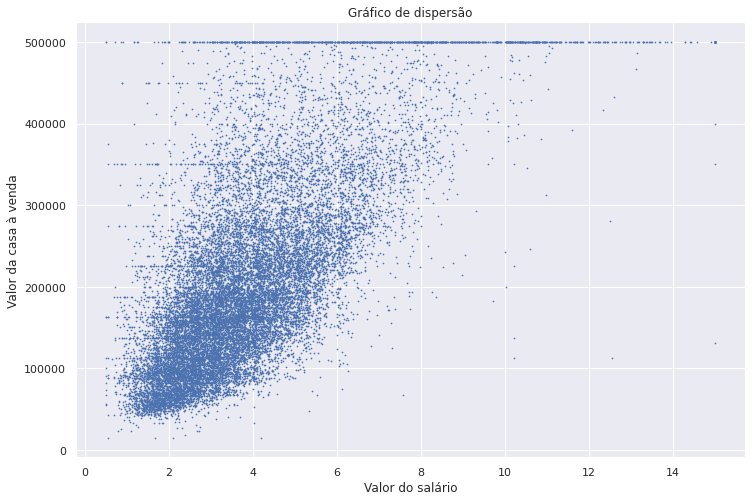

In [31]:
fig, ax = plt.subplots(figsize=(12,8))

df.plot.scatter(x='median_income', y='median_house_value', ax=ax, s=.5)
ax.set_title("Gráfico de dispersão")
ax.set_xlabel("Valor do salário")
ax.set_ylabel("Valor da casa à venda")

plt.show()

###Boxplot

*Boxplot*, ou diagrama de caixa em português, é uma ferramenta estatística que consegue representar a variação de uma variável utilizando quartis.

Os limites inferior e superior se extendem para fora do boxplot para conseguir representar a variabilidade da distribuição dos dados. Valores que estejam além desses limites podem ser considerados como sendo *outliers*.

Uma coisa que vale a pena ressaltar é que entre o primeiro e o terceiro quartil está a mediana, que também é o segundo quartil do *boxplot*. 

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Elements_of_a_boxplot_pt.svg/2560px-Elements_of_a_boxplot_pt.svg.png"width="450px"></center>

A figura abaixo representa muito bem como estão relacionados o *boxplot* e a função densidade de probabilidade de uma população que segue uma distribuição normal $N(0, 1\sigma^2)$.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1920px-Boxplot_vs_PDF.svg.png"width="400px"></center>

####Preparando os dados

In [32]:
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/dengue-dataset.csv")

df.head()

,data,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
0,1998-01-01,237,179.2,25.7,20.2,28.1
1,1998-02-01,331,226.3,25.1,20.0,28.0
2,1998-03-01,562,149.1,24.8,22.4,27.2
3,1998-04-01,187,46.4,22.7,18.1,26.0
4,1998-05-01,32,88.3,19.2,15.7,22.9


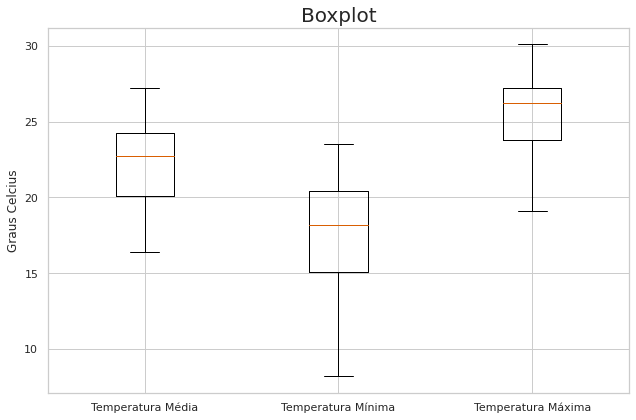

In [66]:
fig, ax = plt.subplots(figsize=(9,6))

ax.boxplot([df['temperatura-media'], df['temperatura-mininima'], df['temperatura-maxima']],
           labels=['Temperatura Média', 'Temperatura Mínima', 'Temperatura Máxima'])
ax.set_title('Boxplot', fontdict={'fontsize':20})
ax.set_ylabel("Graus Celcius")


plt.tight_layout()

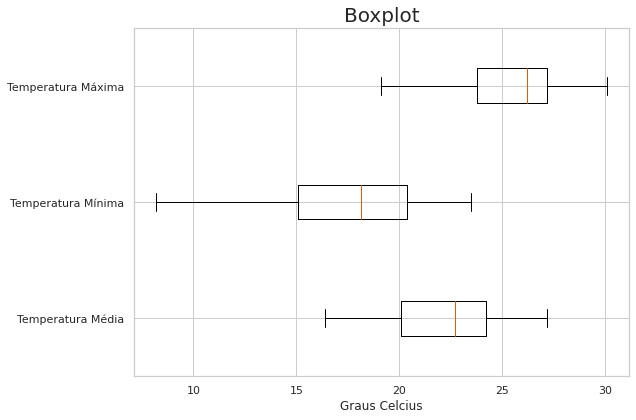

In [67]:
fig, ax = plt.subplots(figsize=(9,6))

ax.boxplot([df['temperatura-media'], df['temperatura-mininima'], df['temperatura-maxima']],
           labels=['Temperatura Média', 'Temperatura Mínima', 'Temperatura Máxima'],
           vert=False)
ax.set_title('Boxplot', fontdict={'fontsize':20})
ax.set_xlabel("Graus Celcius")


plt.tight_layout()

##Gráfico de Waffle

Se o nome não é familiar, com certeza você já viu vários exemplos de *waffle charts* em sites, revistas e jornais, pois eles não apenas transmitem informações claramente, mas são visualmente mais impactantes que gráficos de barras ou pizza.

<img src="http://sigmoidal.ai/wp-content/uploads/2019/10/grafico_de_waffle.png" height="250px">

A figura acima mostra como a biblioteca `pywaffle` foi usada para mostrar pictorialmente o resultado das eleições dos EUA em 2016.

Pode reparar, os grandes meios de comunicação preferem esse tipo de visualização, pois nem todo mundo está acostumado a interpretar gráficos de linhas ou barras.

Como vamos ver abaixo, a biblioteca tem muitas outras formas de customização, e recomendo você incluir ela no seu arsenal de ferramentas.

###Instalação

In [34]:
# instalar o pywaffle
!pip install pywaffle -q

     |████████████████████████████████| 532kB 2.8MB/s 


In [35]:
from pywaffle import Waffle

###Preparando os dados

In [36]:
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/ocorrencias_aviacao.csv")

# extrair value counts da variavel ocorrencia_classificacao
# Deixar os dados como dicionário
data = df.ocorrencia_classificacao.value_counts().to_dict()
data

{'ACIDENTE': 1714, 'INCIDENTE': 2861, 'INCIDENTE GRAVE': 633}

###Criando os gráficos

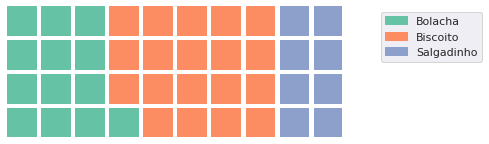

In [37]:
# exemplo de Waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=4, # -> número de linhas
                columns=10, # -> número de colunas
                values={'Bolacha': 33,
                        'Biscoito': 48,
                        'Salgadinho': 19},
                legend={'loc': 'upper left',
                        'bbox_to_anchor': (1.1, 1)}
                )

fig.set_tight_layout(False)
plt.show()

#####Usando icones

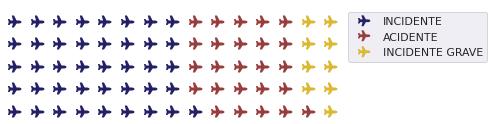

In [38]:
# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=15,
                colors=("#232066", "#983D3D", "#DCB732"),
                values=data, icons='plane', icon_size=12,
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
                icon_legend=True
                )
fig.set_tight_layout(False)
plt.show();

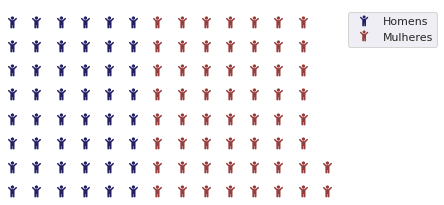

In [39]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=8, 
    values={'Homens': 48, 'Mulheres': 58}, 
    colors=("#232066", "#983D3D"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=12, 
    icon_legend=True
)

fig.set_tight_layout(False)
plt.show();

##WordClouds

[Documentação](https://amueller.github.io/word_cloud/)

Wordcloud é também um tipo de visualização de dados muito poderosa, principalmente quando estamos trabalhando com textos, documentos, pesquisas, entre outras.

Uma dificuldade que temos é excluir palavras como artigos e pronomes da nossa análise. Uma vez que eles aparecem com frequência, podem tirar o protagonismo de palavras que de fato deveriam aparecer maiores.

####Instalando e importando

In [40]:
# instalar wordcloud
!pip install wordcloud -q

In [41]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

####Preparando os dados

In [42]:
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-05-24/data/listings.csv.gz")

df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20200524171540,2020-05-25,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. Please contact ...,"- Beautiful, sunny 2 bedroom (90 square meters...",Discounts for long term stays. Please contact ...,none,This is the one of the bests spots in Rio. Bec...,NaN,Excellent location. Close to all major attract...,The entire apartment is yours. It's like your ...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,NaN,NaN,https://a0.muscache.com/im/pictures/65320518/3...,NaN,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,...,$0.00,7,180,7,7,1125,1125,7.0,1125.0,3 months ago,t,23,53,83,335,2020-05-25,251,23,2010-07-15,2020-04-06,93.0,9.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,moderate,f,f,1,1,0,0,2.09
1,21280,https://www.airbnb.com/rooms/21280,20200524171540,2020-05-25,Renovated Modern Apt. Near Beach,Immaculately renovated top-floor apartment ove...,Immaculately renovated top-floor apartment in ...,Immaculately renovated top-floor apartment ove...,none,This is the best neighborhood in Zona Sul. Fo...,NaN,The new metro station is just a few steps away...,"This is an older ""Art Deco"" style building, so...",Someone will be there at check in and check ou...,This is a booking agreement for rental of a tw...,NaN,NaN,https://a0.muscache.com/im/pictures/60851312/b...,NaN,81163,https://www.airbnb.com/users/show/81163,Jules,2010-02-14,"Chicago, Illinois, United States",Hi I am Jules and I have a beautiful apartment...,within a few hours,100%,90%,f,https://a0.muscache.com/im/users/81163/profile...,https://a0.muscache.com/im/users/81163/profile...,Ipanema,0.0,0.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Rio de Janeiro, RJ, Brazil",Ipanema,Ipanema,...,$0.00,5,30,5,5,30,30,5.0,30.0,3 months ago,t,30,60,90,90,2020-05-25,94,6,2014-02-14,2020-03-22,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.23
2,25026,https://www.airbnb.com/rooms/25026,20200524171540,2020-05-25,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renov

In [43]:
# ver a quantidade de valores ausentes
print("Valores ausentes para summary: ", df.summary.isnull().sum())

# eliminar as colunas com valores ausentes
summary = df.dropna(subset=['summary'], axis=0)['summary']

Valores ausentes para summary:  2577


In [44]:
# concatenar as palavras
all_summary = " ".join(s for s in summary)

print(f"Quantidade de Palavras: {format(len(all_summary))}")

Quantidade de Palavras: 10003725


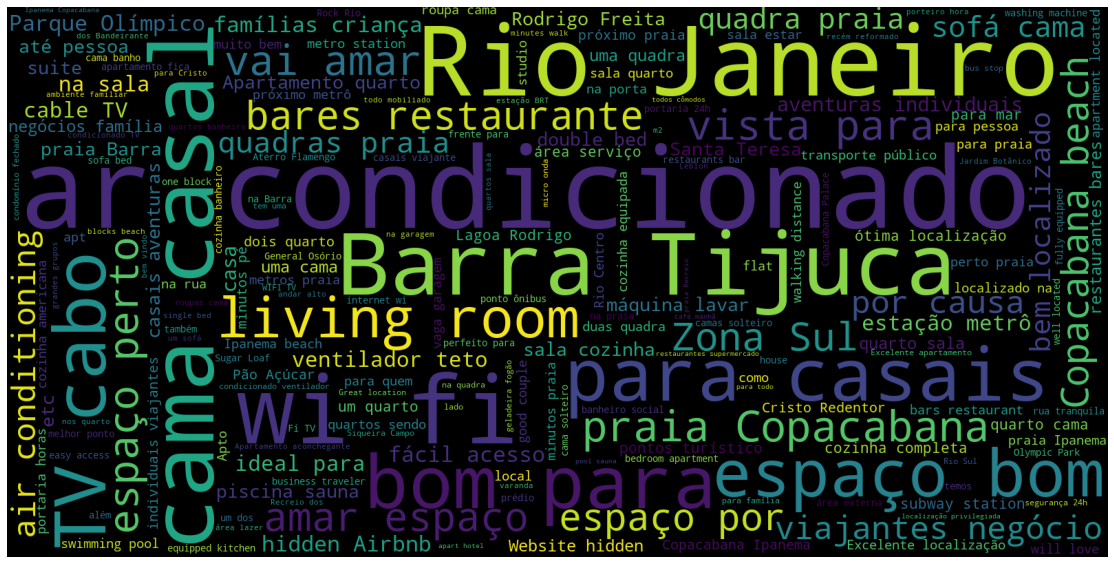

In [45]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"])

# gerar uma wordcloud (instanciando o objeto)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
# Salvando o arquivo da imagem
wordcloud.to_file("airbnb_summary_wordcloud.png",)

plt.tight_layout()

##Seaborn

Seaborn é uma biblioteca de visualização do Python baseada no `matplotlib`. Fornecendo uma interface de alto nível, permite a construção de gráficos estatísticos mais atraentes e informativos.

<p align=center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/seaborn.png"></p>

Para você ter uma noção dos tipos de gráficos que podem ser construídos com a biblioteca `seaborn`, dê uma olhada na [galeria de exemplos](https://seaborn.pydata.org/examples/index.html#example-gallery) ou acompanhe os [tutoriais](https://seaborn.pydata.org/tutorial.html#tutorial) fornecidos na própria documentação do pacote.

Se você está se perguntando o motivo pelo qual você usaria o `seaborn` e não `matplotlib`, eu posso te dar algumas vantagens:

* Matplotlib não é otimizado para o Pandas, uma vez que é mais antigo (veio antes) que ele.
* Matplotlib é baixo nível se comparado ao Seaborn. Ser mais baixo nível significa que você precisa de mais código e mais trabalho para conseguir customizar seus gráficos.
* Deixar um gráfico *sexy* e atraente no Matplotlib pode ser uma tarefa árdua!
* Há vários tipos de gráficos não contemplados no Matplotlib, mas que estão presentes no Seaborn.

###**PODEMOS USAR O ESTILO DO SEABORN APLICADO AOS GRÁFICOS DO MATPLOTPLIB SIMPLESMENTE USANDO:**

Configurações de estilo e cor da biblioteca *seaborn*

Controle de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

Paleta de cores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

In [46]:
sns.set()
sns.set_palette("Dark2")
sns.set_style("whitegrid")

###Gráfico de Dispersão

####Preparando dados

In [47]:
dados = pd.read_csv('https://s3.amazonaws.com/caelum-online-public/1039-seaborn/material/tips.csv')
dados['porcentagem'] = round((dados['tip'] / dados['total_bill'])*100, 2)

In [48]:
dados.head()

,total_bill,tip,dessert,day,time,size,porcentagem
0,16.99,1.01,No,Sun,Dinner,2,5.94
1,10.34,1.66,No,Sun,Dinner,3,16.05
2,21.01,3.50,No,Sun,Dinner,3,16.66
3,23.68,3.31,No,Sun,Dinner,2,13.98
4,24.59,3.61,No,Sun,Dinner,4,14.68


#### Scatterplot

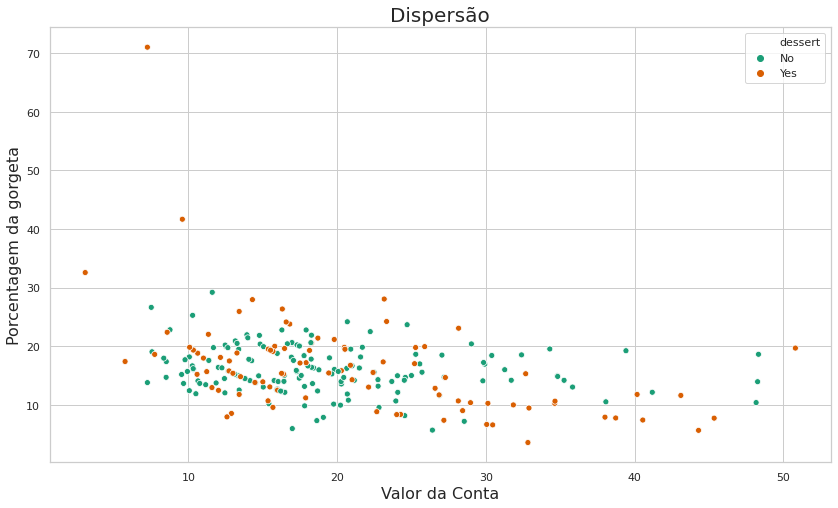

In [49]:
ax = sns.scatterplot(x='total_bill', y='porcentagem', data=dados, hue='dessert')
# O atributo hue, permite separar com cores diferentes uma váriavel especifica

ax.set_title("Dispersão", fontsize=20)
ax.figure.set_size_inches(14,8)
ax.set_xlabel("Valor da Conta", fontsize=16)
ax.set_ylabel("Porcentagem da gorgeta", fontsize=16)

plt.show()

####**Lmplot** ou **Relplot**

Lmplot - com a linha de regressão

Relplot - sem a linha de regressão

#####Normal

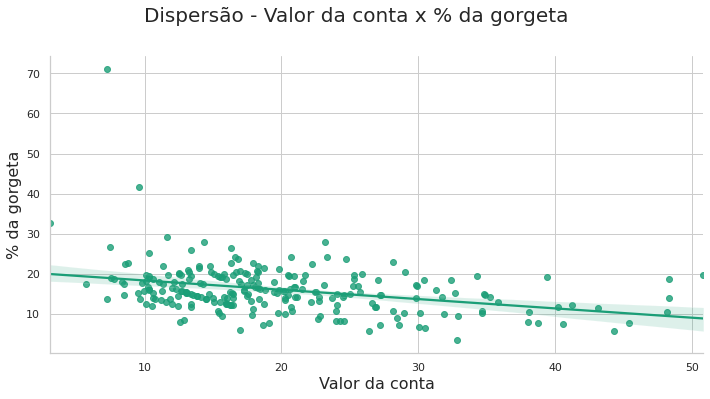

In [50]:
ax = sns.lmplot(x='total_bill', y='porcentagem', data=dados, height=5, aspect=2)
ax.fig.suptitle('Dispersão - Valor da conta x % da gorgeta', fontsize=20, y=1.1)
ax.set_xlabels('Valor da conta', fontsize=16)
ax.set_ylabels('% da gorgeta', fontsize=16)

plt.show()

#####Com uma variável em destaque

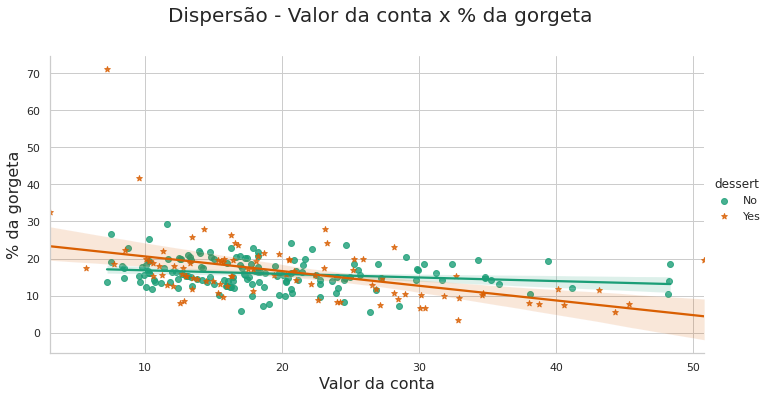

In [51]:
ax = sns.lmplot(x='total_bill', y='porcentagem', data=dados, hue='dessert',
                markers=['o', '*'], height=5, aspect=2)
ax.fig.suptitle('Dispersão - Valor da conta x % da gorgeta', fontsize=20, y=1.1)
ax.set_xlabels('Valor da conta', fontsize=16)
ax.set_ylabels('% da gorgeta', fontsize=16)

plt.show()

#####Com uma variável em destaque em 2 plots

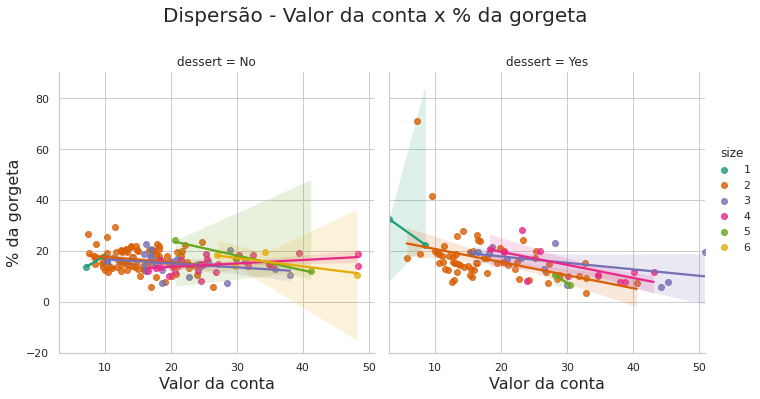

In [52]:
ax = sns.lmplot(x='total_bill', y='porcentagem', data=dados, col='dessert',
                hue='size', height=5, aspect=1)
# Utilize o parametros hue, podemos colocar mais uma variável em análise

ax.fig.suptitle('Dispersão - Valor da conta x % da gorgeta', fontsize=20, y=1.1)
ax.set_xlabels('Valor da conta', fontsize=16)
ax.set_ylabels('% da gorgeta', fontsize=16)

plt.show()

####Joinplot

Já plota com um histograma junto

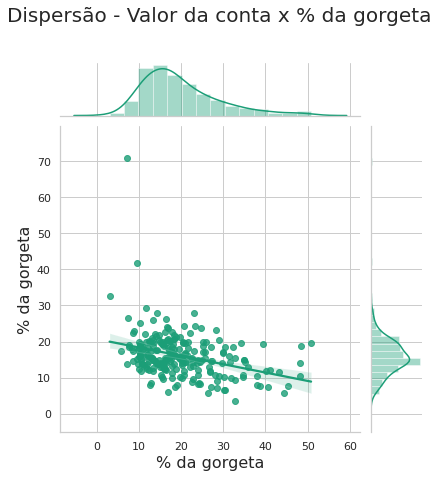

In [53]:
ax = sns.jointplot(x='total_bill', y='porcentagem', data=dados, kind='reg')
ax.fig.suptitle('Dispersão - Valor da conta x % da gorgeta', fontsize=20, y=1.1)
ax.set_axis_labels('% da gorgeta', '% da gorgeta', fontsize=16)

plt.show()

####Pairplot

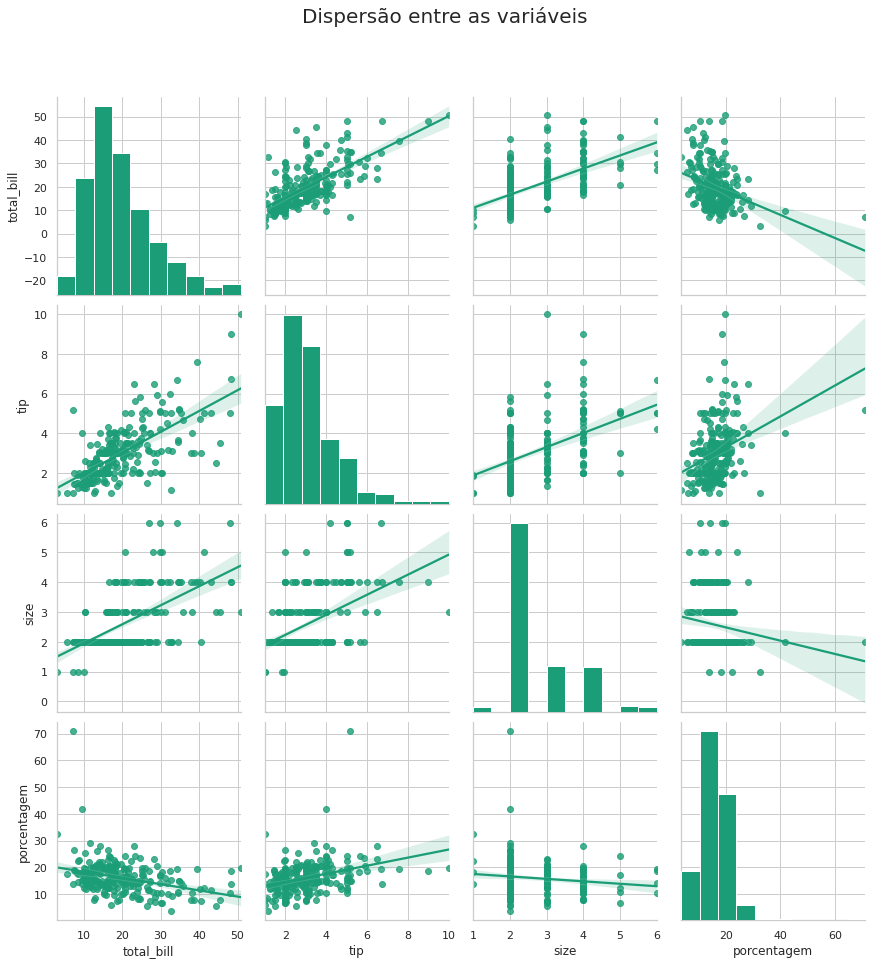

In [54]:
ax = sns.pairplot(dados, kind='reg', height=3)
# O atributo kind='reg', nos mostra e linha de regressão
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.1)

plt.show()

##### Apenas uma linha

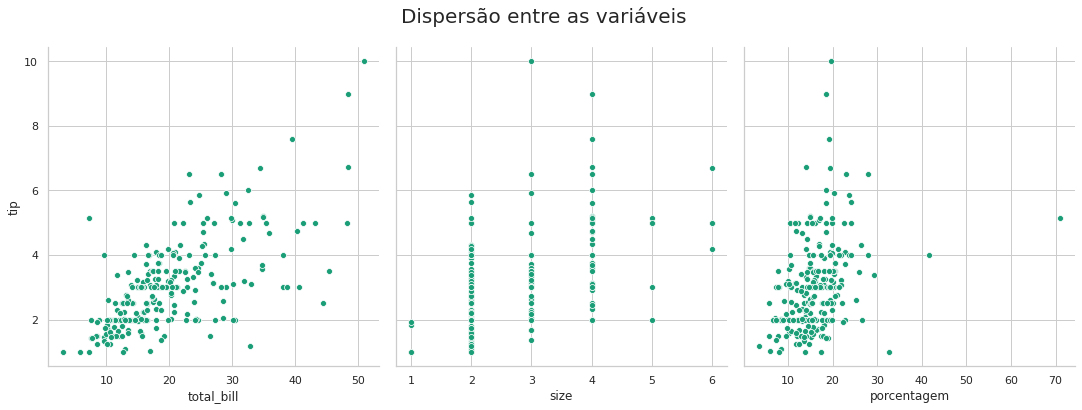

In [55]:
ax = sns.pairplot(dados, x_vars=['total_bill', 'size', 'porcentagem'], y_vars='tip', height=5)
# O atributo kind='reg', nos mostra e linha de regressão
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.1)

plt.show()

####Catplot

Plotar dispersão em uma categoria

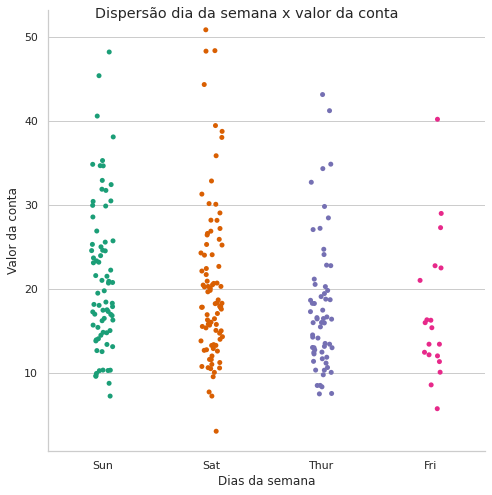

In [56]:
ax = sns.catplot(x='day',y='total_bill', data=dados, height=7)
ax.fig.suptitle("Dispersão dia da semana x valor da conta")
ax.set_axis_labels('Dias da semana', 'Valor da conta')

plt.show()

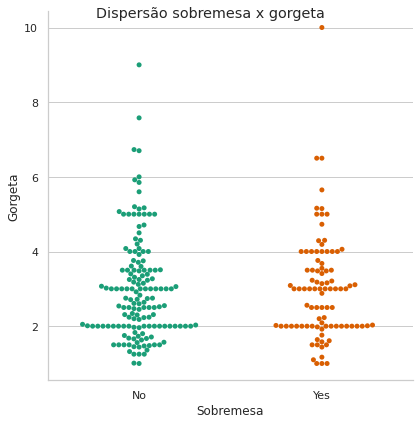

In [57]:
ax = sns.catplot(x='dessert', y='tip', data=dados, height=6, kind='swarm')
# o atributo kind='swarm', espaça os pontos que estão juntos
ax.fig.suptitle("Dispersão sobremesa x gorgeta")
ax.set_axis_labels('Sobremesa', 'Gorgeta')

plt.show()

####Violinplot

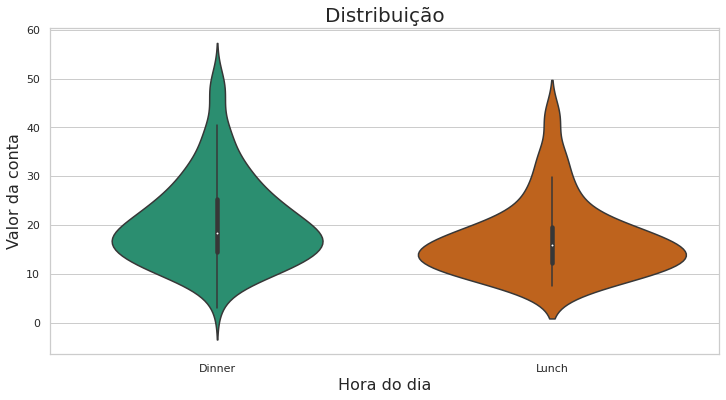

In [58]:
ax = sns.violinplot(x='time', y='total_bill', data=dados)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição', fontsize=20)
ax.set_xlabel('Hora do dia', fontsize=16)
ax.set_ylabel('Valor da conta', fontsize=16)

plt.show()

###Boxplot

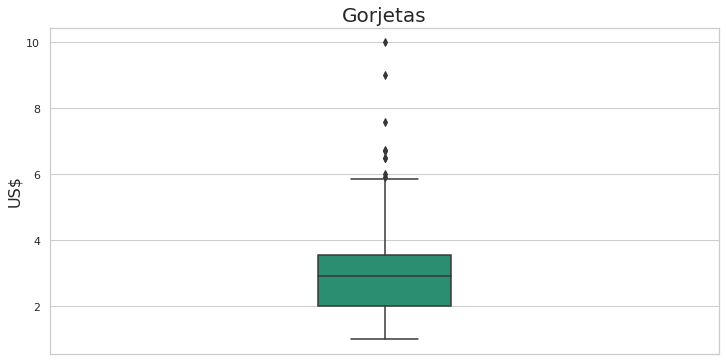

In [59]:
ax = sns.boxplot(dados.tip, width=0.2, orient='v')
ax.figure.set_size_inches(12,6)
ax.set_title('Gorjetas', fontsize=20)
ax.set_ylabel('US$', fontsize=16)

plt.show()

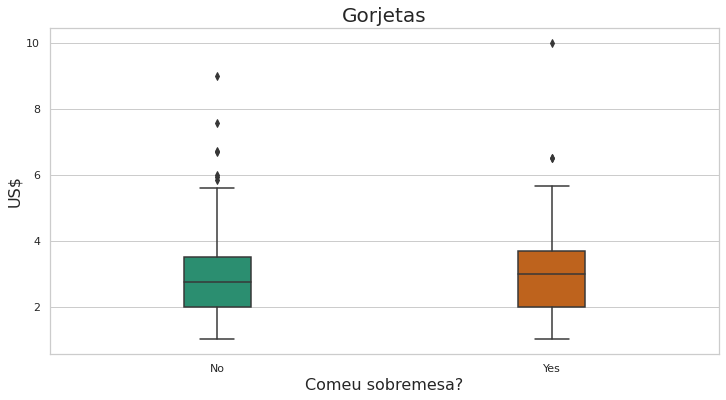

In [60]:
ax = sns.boxplot(x=dados.dessert, y=dados.tip, width=0.2, orient='v')
ax.figure.set_size_inches(12,6)
ax.set_title('Gorjetas', fontsize=20)
ax.set_ylabel('US$', fontsize=16)
ax.set_xlabel('Comeu sobremesa?', fontsize=16)

plt.show()

###Histograma

Text(0.5, 0, 'Valor em US$')

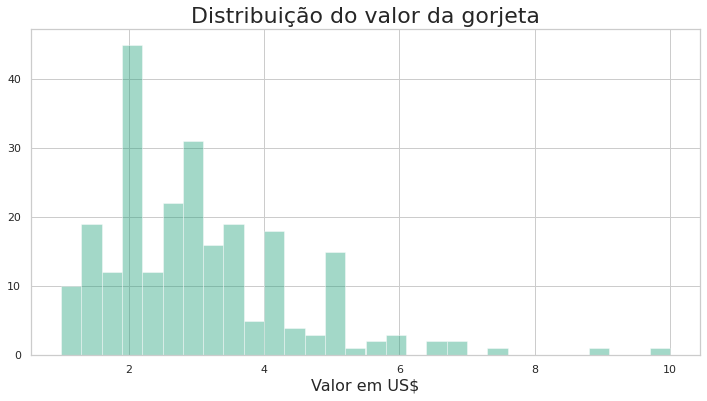

In [61]:
ax = sns.distplot(dados.tip, kde=False, bins=30)
#kde tira a linha do traçado e bins são o número de colunas
ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição do valor da gorjeta", fontsize=22)
ax.set_xlabel("Valor em US$", fontsize=16)

###Gráfico de Linha

In [68]:
#criando o dataframe
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/dengue-dataset.csv")

df.data = pd.to_datetime(df.data) # -> Convertendo para o formato datetime
df.set_index('data', inplace=True) 

df.head()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
data,,,,,
1998-01-01,237,179.2,25.7,20.2,28.1
1998-02-01,331,226.3,25.1,20.0,28.0
1998-03-01,562,149.1,24.8,22.4,27.2
1998-04-01,187,46.4,22.7,18.1,26.0
1998-05-01,32,88.3,19.2,15.7,22.9


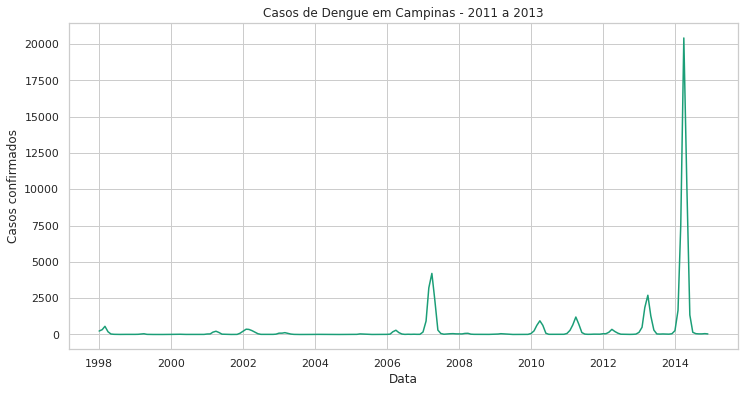

In [69]:
ax = sns.lineplot(x=df.index, y=df['casos-confirmados'])

ax.figure.set_size_inches(12,6)
ax.set_title("Casos de Dengue em Campinas - 2011 a 2013")
ax.set_xlabel("Data")
ax.set_ylabel("Casos confirmados")
plt.show()

#####Plotando 2 informações na mesma imagem

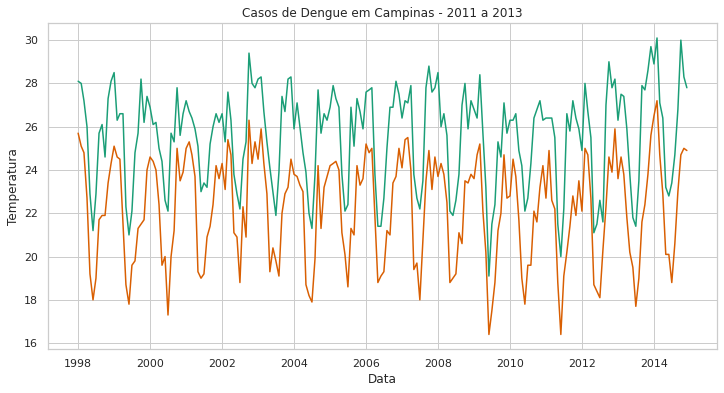

In [64]:
ax = sns.lineplot(x=df.index, y=df['temperatura-maxima'])
ax = sns.lineplot(x=df.index, y=df['temperatura-media'])

ax.figure.set_size_inches(12,6)
ax.set_title("Casos de Dengue em Campinas - 2011 a 2013")
ax.set_xlabel("Data")
ax.set_ylabel("Temperatura")
plt.show()

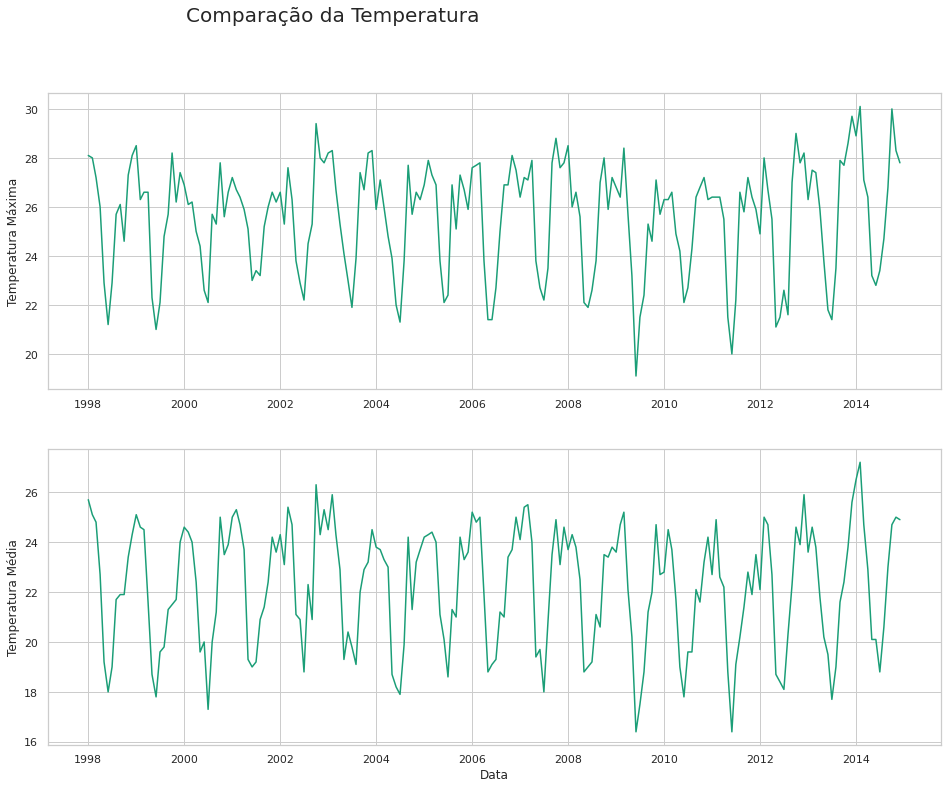

In [77]:
fig, ax = plt.subplots(figsize=(16,12))
fig.suptitle("Comparação da Temperatura", fontsize=20, ha='right')

plt.subplot(2,1,1)
ax = sns.lineplot(x=df.index, y=df['temperatura-maxima'])
ax.set_ylabel("Temperatura Máxima")
ax.set_xlabel("")

plt.subplot(2,1,2)
ax = sns.lineplot(x=df.index, y=df['temperatura-media'])
ax.set_ylabel("Temperatura Média")
ax.set_xlabel("Data")

plt.show()